<a href="https://colab.research.google.com/github/AlessandroConte/stroke-prediction/blob/main/stroke_prediction_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT INTRO



Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Libraries import

In [1]:
# libraries import

import pandas as pd



# Upload dataset

In [2]:
# upload the stroke dataset
from google.colab import files

uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [3]:
# read the csv file (dataset)

df = pd.read_csv("healthcare-dataset-stroke-data.csv")


## EDA (Exploratory Data Analysis)

---


In this section, we perform an initial exploration of the dataset to better understand the structure, distribution, and relationships within the data. The goal of the Exploratory Data Analysis (EDA) phase is to identify patterns, detect anomalies, check for missing values, and gain insights that can guide data preprocessing and feature engineering. We will examine both numerical and categorical features, visualize key variables, and assess their potential impact on stroke prediction.




### Dataset overview

In [4]:
# check the dataset's structure

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the output above we can see that the DataFrame has:

*   5110 rows (from index 0 to 5109)
*   12 columns (i.e., 12 variables)
*   By looking at the "Non-Null Count" we can clearly see where the missing values are (in this case the bmi column has 201 missing (NaN) values)

In [5]:
# statistical summary
df.describe(include='all')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


By running `df.describe(include='all')`, we obtain a summary of both numerical and categorical columns.

* For numerical columns (e.g., age, bmi), the output includes statistics such as mean, standard deviation, min, max, and quartiles.
* For categorical columns (e.g., gender, work_type), it shows the number of unique categories, the most frequent value (`top`), and its frequency (`freq`).
* This helps us quickly understand the distribution, detect outliers, and identify missing values (e.g., the `bmi` column has 201 missing entries).


In [6]:
# sum all of the missing values

df.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


There are 201 missing values in the bmi index column (i.e., bodymass index). In the next section we are going to handle them

In [7]:
# check the features type
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


Note :
*  Categorical variables :  gender, ever_married, work_type, Residence_type, smoking_status
* Numerical variables : id, age, hypertension, heart_desease, avg_glucose_level, bmi
* Target : stroke

### Target Variable Distribution and Class Imbalance

We examine the distribution of the target variable (`stroke`) to assess if the dataset is balanced or imbalanced. This step is critical to understand potential challenges in model training.

In [8]:
df['stroke'].value_counts(normalize=True)


,proportion
stroke,
0,0.951272
1,0.048728


The target variable `stroke` is highly imbalanced, with approximately 95.1% of the instances belonging to the negative class (no stroke) and only about 4.9% representing positive stroke cases. This significant imbalance poses a challenge for model training, as standard algorithms may be biased towards the majority class. Therefore, special attention is required in model evaluation and potentially in the application of techniques to handle class imbalance.

### Data Visualization

Text(0.5, 1.0, 'Target distribution (stroke)')

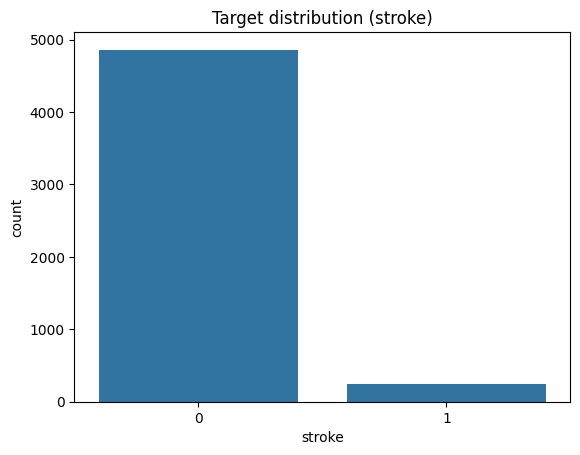

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df)
plt.title('Target distribution (stroke)')


As we can see most of the stroke values are 0

<Axes: xlabel='stroke', ylabel='age'>

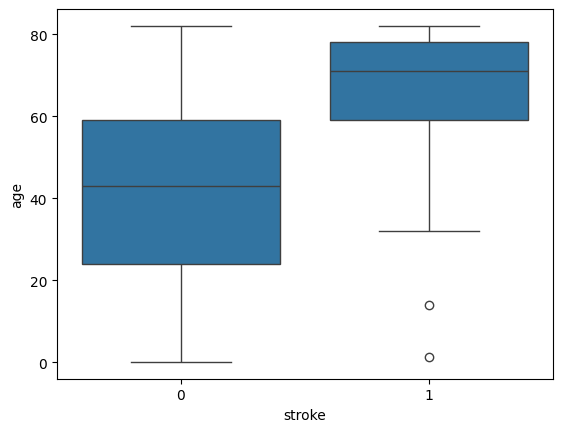

In [10]:
# Boxplot
sns.boxplot(x='stroke', y='age', data=df)


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

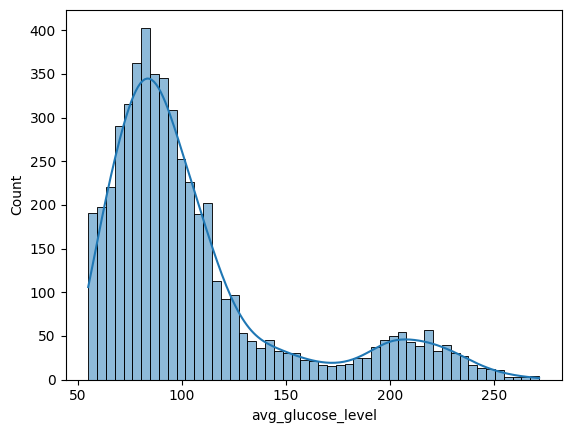

In [11]:
sns.histplot(df['avg_glucose_level'], kde=True)


This histogram shows that the majority of patients have an average glucose level around 80–90. The distribution appears to be right-skewed, with a primary peak in the lower glucose range and a secondary peak around 200, suggesting the presence of two distinct subgroups: one possibly representing patients with normal glucose levels, and the other representing those at risk due to elevated levels.

We can also observe that some patients have extremely high glucose levels, exceeding 250. These could either be outliers or may indicate severe cases of hyperglycemia, which is relevant because hyperglycemia is a well-known risk factor for strokes.

This distribution may justify further analysis to determine whether patients with higher glucose levels are more likely to have suffered a stroke. Understanding this relationship could support the identification of high-risk patients and contribute to the development of predictive models for stroke occurrence.

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

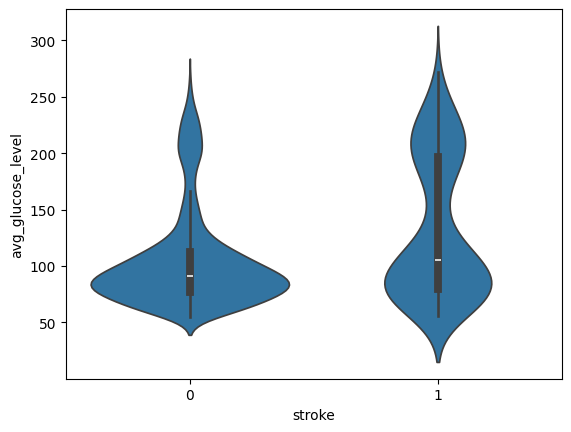

In [12]:
sns.violinplot(x='stroke', y='avg_glucose_level', data=df)

<Axes: >

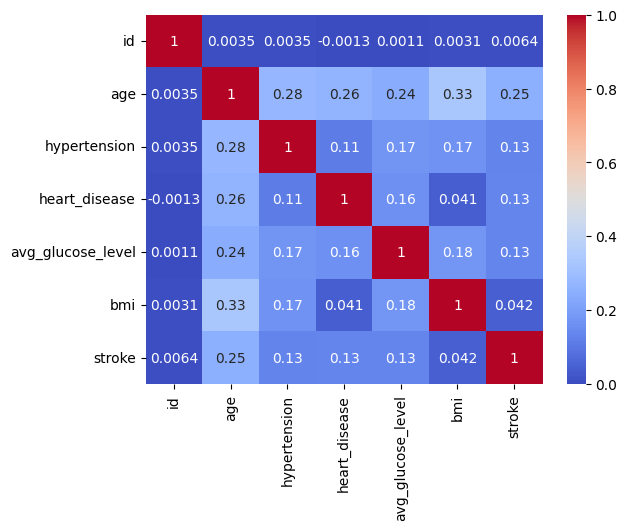

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


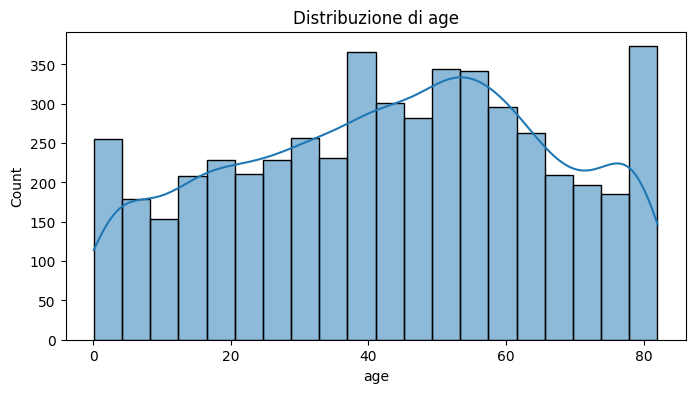

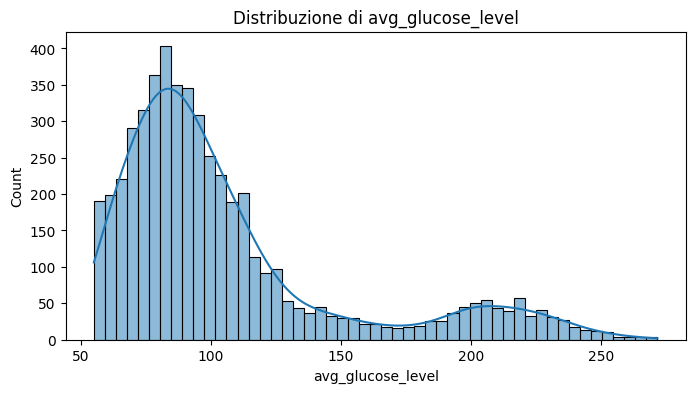

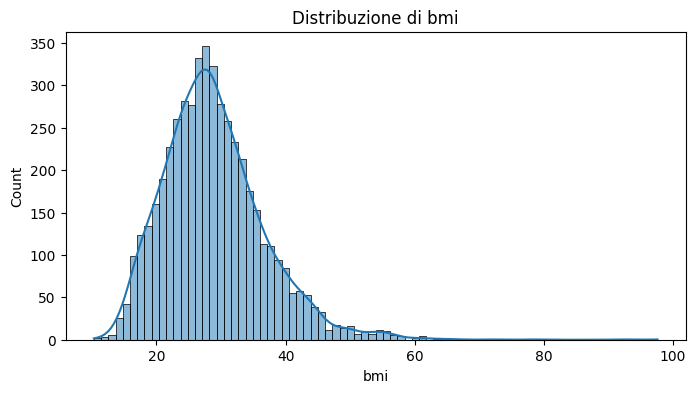

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribuzione di {feature}')
    plt.show()


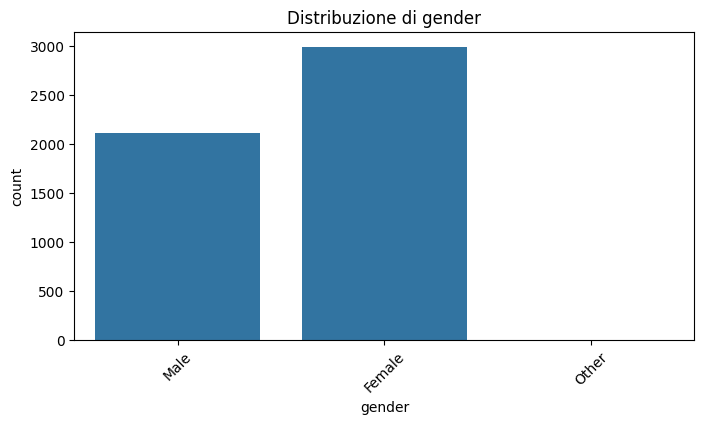

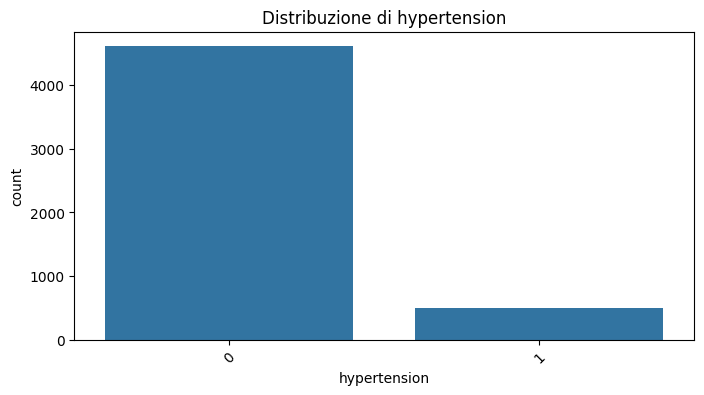

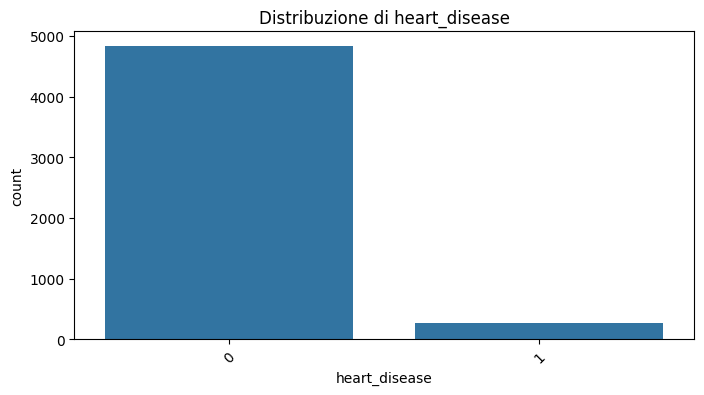

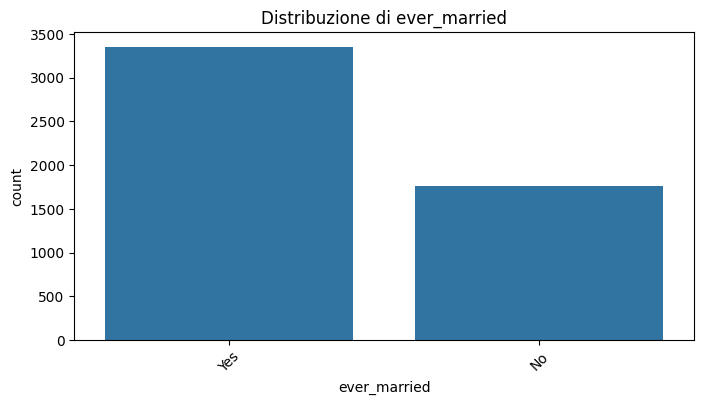

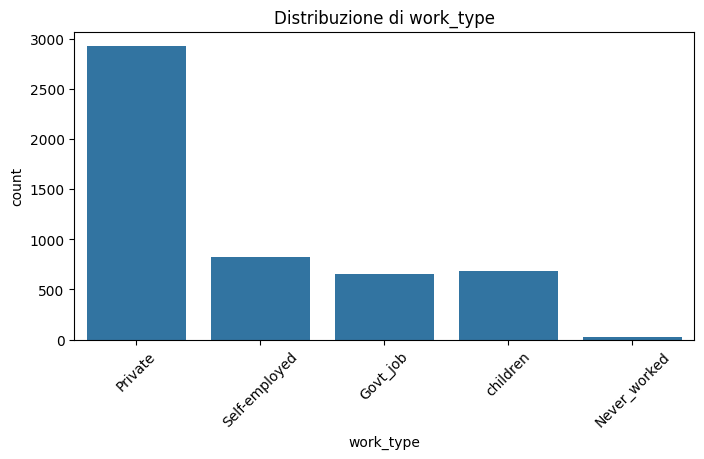

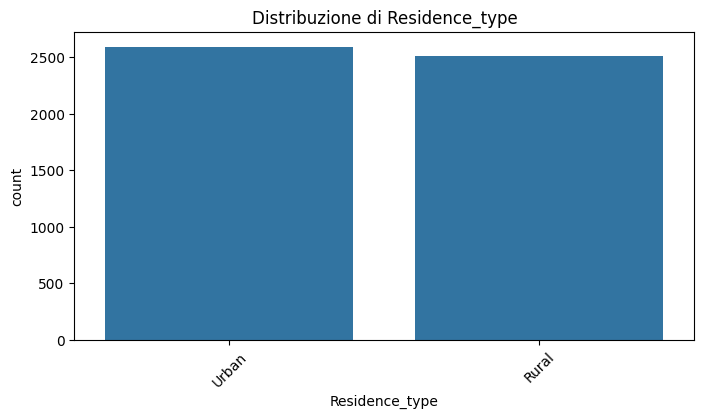

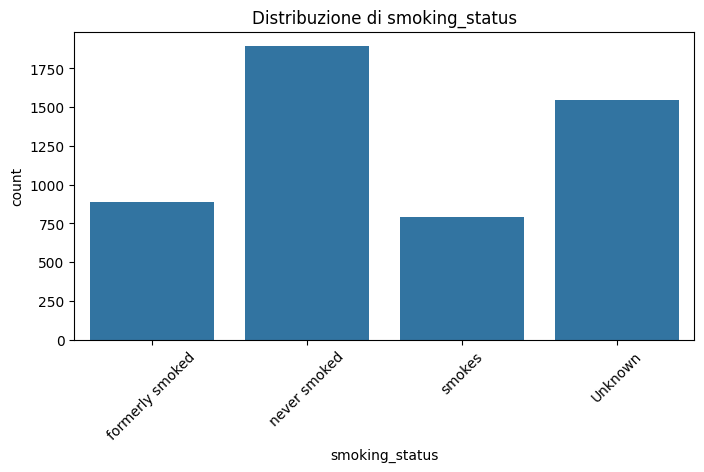

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribuzione di {feature}')
    plt.xticks(rotation=45)
    plt.show()


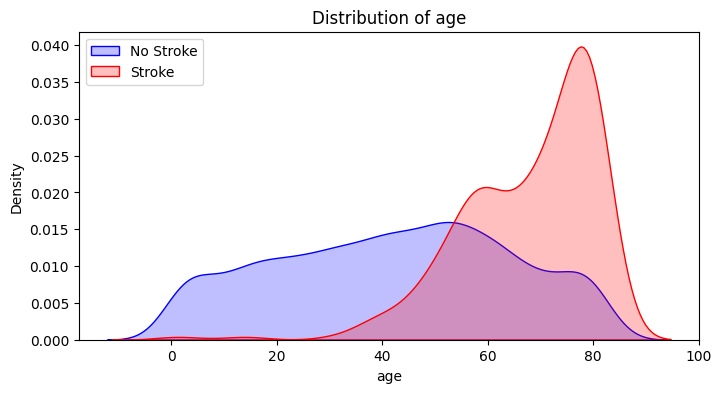

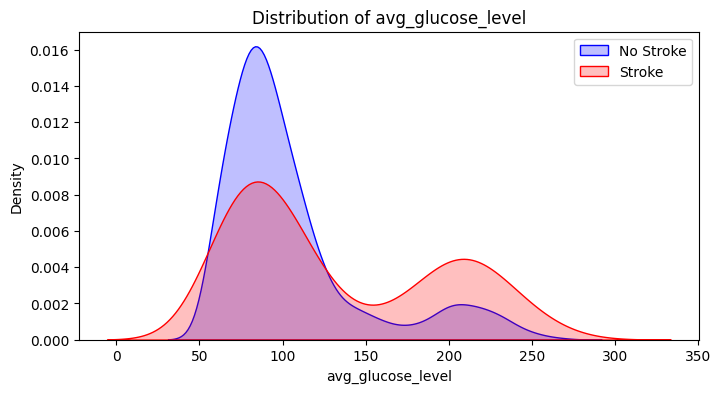

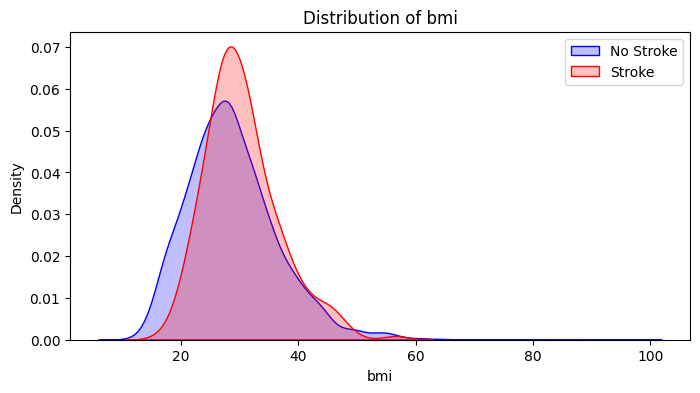

In [16]:
continuous_features = ['age', 'avg_glucose_level', 'bmi']

for column in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[df['stroke']==0][column], label='No Stroke', fill=True, color='blue')
    sns.kdeplot(df[df['stroke']==1][column], label='Stroke', fill=True, color='red')
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()


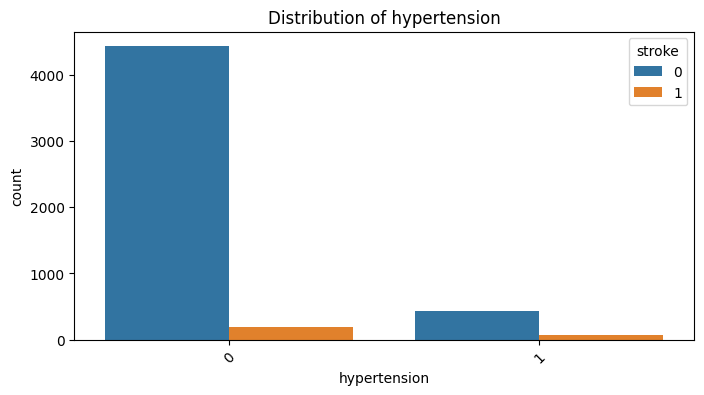

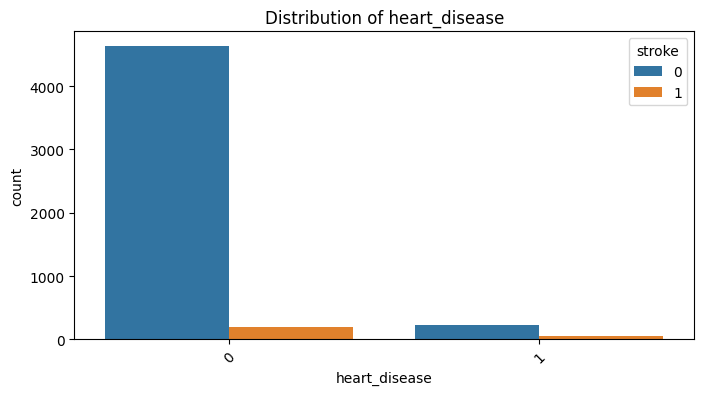

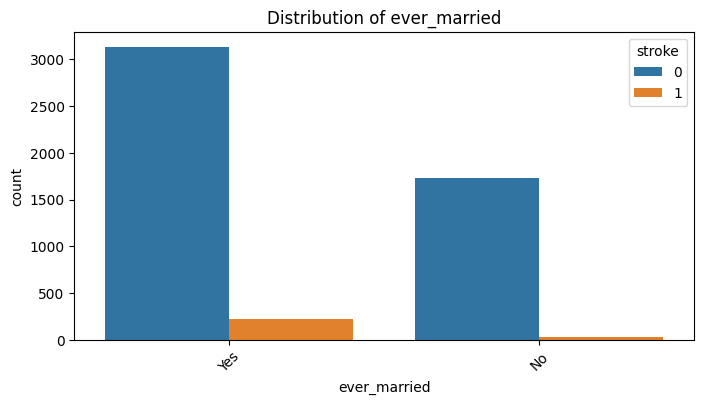

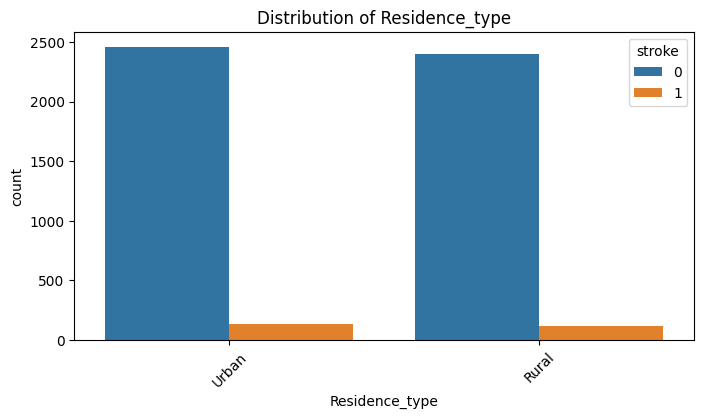

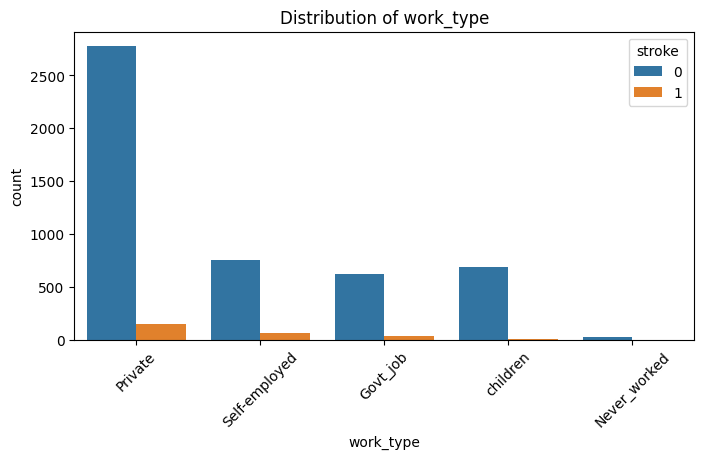

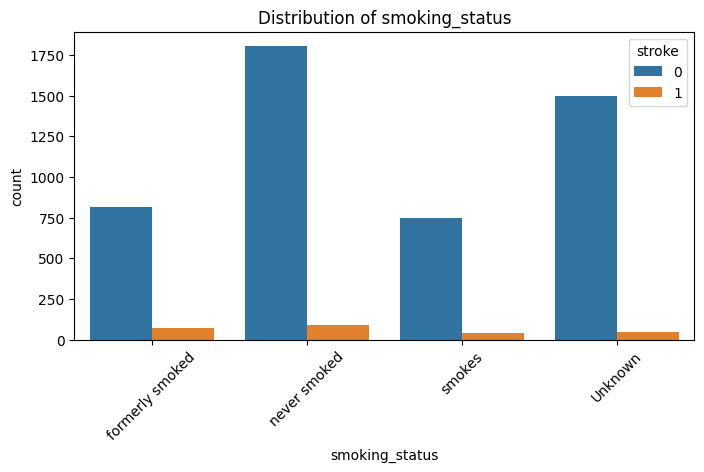

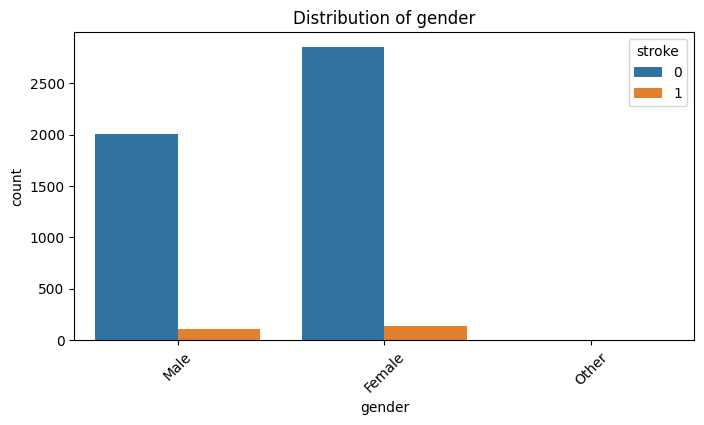

In [17]:
categorical_features = ['hypertension', 'heart_disease', 'ever_married',
                        'Residence_type', 'work_type', 'smoking_status', 'gender']

for column in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, hue='stroke')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


## Preprocessing: Data Cleaning, Encoding, Scaling and Splitting

---

Before training any machine learning models, it is crucial to preprocess the data to ensure its quality and compatibility with various algorithms. In this section, we handle several key preprocessing steps:

- **Data cleaning**: to address missing values and correct inconsistencies.
- **Encoding**: to convert categorical variables into numerical format suitable for modeling.
- **Feature scaling**: to normalize numerical variables and ensure balanced contribution to the model.
- **Data splitting**: to divide the dataset into training and testing subsets, which enables reliable model evaluation.

These preprocessing steps are essential to build robust and generalizable predictive models.


### Data cleaning

The `bmi` feature contains missing values, which we handle by imputing the median. The median is a robust statistic that is not affected by extreme values or skewed distributions, making it a suitable choice for numerical data like BMI. This helps preserve the central tendency of the variable without introducing bias.



In [18]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


### Encoding

To prepare categorical variables for machine learning, we applied both label encoding and one-hot encoding based on the nature of each feature:

- `ever_married` and `Residence_type` are binary categorical variables, so we used label encoding to map their values directly to 0 and 1.
- For `work_type`, `smoking_status`, and `gender`, we used one-hot encoding via `pd.get_dummies()` to create dummy variables. We set `drop_first=True` to avoid multicollinearity caused by redundant dummy columns.

This encoding ensures that all categorical variables are transformed into a numeric format suitable for model training, without implying any ordinal relationship where it doesn’t exist.


In [19]:
# label encoding

df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})


In [20]:
# one-hot encoding

df = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'gender'], drop_first=True)
# drop_first = True to avoid multicollinearity

### Features Scaling

To ensure that numerical features contribute equally to the model and are not dominated by variables with larger scales, we standardized the `age`, `avg_glucose_level`, and `bmi` features using `StandardScaler`. Standardization rescales the features to have a mean of 0 and a standard deviation of 1, which is particularly important for algorithms sensitive to feature magnitudes, such as logistic regression or gradient-based models.

We applied feature scaling only to the continuous numerical features beacuse of the different value ranges and units, which could bias certain algorithms. Scaling them ensures uniform contribution to the model. We excluded the encoded categorical variables, as they are already binary (0/1) and do not require scaling.




In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


### Data splitting

#### Splitting Features and Target

We separate the dataset into features (`X`) and the target variable (`y`, which is `stroke`) to prepare for model training.


In [22]:
X = df.drop('stroke', axis=1)
y = df['stroke']


#### Train/Test Split

To evaluate the model’s ability to generalize to unseen data, we split the dataset into training and testing sets using an 80/20 ratio. The `train_test_split()` function is used with a fixed `random_state` for reproducibility.

We also set the `stratify=y` parameter to ensure that the proportion of classes in the target variable is preserved in both the training and test sets. This is particularly important because the target variable in the Stroke Prediction dataset is highly imbalanced — only a small percentage of samples belong to the positive class (stroke = 1).

Without `stratify=y`, we could end up with a test set that contains:
- Only negative cases (stroke = 0)
- Or an unrepresentative number of positive cases (stroke = 1)

By using `stratify=y`, we guarantee that the class distribution (0s and 1s) is maintained consistently across both subsets, improving the reliability of performance evaluation.


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Baseline Model: Logistic Regression

---

As a starting point, we use a simple Logistic Regression model to establish a baseline for stroke prediction. Logistic Regression is a well-known linear classifier that is easy to implement and interpret. While it is not expected to outperform more complex ensemble models, it provides a solid reference point to evaluate improvements offered by subsequent models.

We will evaluate the baseline model using common classification metrics such as accuracy, precision, recall, and the confusion matrix. Despite its simplicity, Logistic Regression often performs reasonably well, especially when the features are properly scaled and the data is preprocessed effectively.


### Logistic Regression: Convergence Adjustment

Initially, the Logistic Regression model raised a `ConvergenceWarning`, indicating that the solver failed to converge within the default number of iterations. This issue persisted even with `max_iter=2000`, and only disappeared after increasing the parameter to `max_iter=10000`.

This behavior is expected with imbalanced datasets or when the optimization surface is complex. The `max_iter` parameter defines how many iterations the solver is allowed before stopping. If the loss function does not converge within that limit, scikit-learn raises a warning to alert the user. Adjusting this parameter ensures that the model reaches stable coefficients for reliable predictions.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the baseline model
baseline_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on test set
y_pred = baseline_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.7495107632093934

Confusion Matrix:
 [[726 246]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



The logistic regression model achieved an overall accuracy of ~75%.

While the precision for the positive class (stroke) is low (0.14), the recall is high (0.80), meaning the model is able to correctly identify most stroke cases.

This trade-off indicates a bias toward capturing positives, which may be acceptable in health-related contexts where missing a positive case is riskier than a false alarm.


## Training and Comparing Classical ML Models

---

To evaluate different modeling approaches on the stroke prediction task, we train and compare three widely-used classification algorithms:  
- **Random Forest**: a robust ensemble method that handles nonlinear relationships and feature interactions well.  
- **K-Nearest Neighbors (KNN)**: a simple yet effective instance-based method that classifies based on proximity in the feature space.  
- **Support Vector Machine (SVM)**: a powerful algorithm that maximizes the margin between classes and performs well in high-dimensional spaces.

These models represent a diverse set of strategies—tree-based, distance-based, and margin-based—allowing us to assess how different learning paradigms handle the characteristics of this dataset.

Each model is evaluated using the following metrics:
- **Accuracy**: the overall correctness of the model.
- **Precision**: the proportion of correctly predicted positive cases among all predicted positives.
- **Recall**: the proportion of correctly predicted positive cases among all actual positives.
- **F1-score**: the harmonic mean of precision and recall, especially important in imbalanced datasets.
- **Confusion matrix**: a detailed view of true positives, true negatives, false positives, and false negatives.

Given the class imbalance in the dataset, relying on accuracy alone would be misleading. For this reason, precision, recall, and F1-score are essential to evaluate the model’s performance on the minority class (stroke = 1).

To avoid redundant code and ensure consistency across evaluations, we define a reusable function named `evaluate_model`.

> **Note:**  
In this project, Support Vector Machines (SVM) are implemented using the `SVC` (Support Vector Classifier) class from scikit-learn, which is specifically designed for classification tasks.



In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# create the function to avoid reduntant code
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Model:", model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("--------------------------------------------------\n")


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# call the function
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)


Model: RandomForestClassifier
Accuracy: 0.9500978473581213

Confusion Matrix:
 [[971   1]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.9510763209393346

Confusion Matrix:
 [[972   0]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

------------------------------------------

### Model Evaluation and Class Imbalance Impact

#### Random Forest & KNN
- Both models reach **95% accuracy**, but this is misleading.
- The **recall for the minority class (stroke = 1)** is **0.00** so the model does **not detect any strokes**.
- This means the model is **just predicting "no stroke" for everyone**, which is dangerous in real-world scenarios.

#### SVC
- This model captures some stroke cases (recall = 0.18), but still performs poorly.
- Accuracy drops to ~72%, but at least the model attempts to distinguish classes.
- Precision and F1-score for the positive class remain low.

#### Confusion Matrices Summary:
| Model      | TP | FN | FP | TN |
|------------|----|----|----|----|
| RF / KNN   | 0  | 50 | 1  | 971 |
| SVM        | 9  | 41 | 243| 729 |

**Conclusion:** Accuracy is not a reliable metric in imbalanced datasets. In the next step, we will apply techniques such as:
- Resampling (e.g., SMOTE)
- Using `class_weight` and more robust metrics like F1-score


# Class Balancing & Model Re-training

## SMOTE

The original dataset was **highly imbalanced**, with only 5% of positive stroke cases. In such situations, machine learning models tend to ignore the minority class, resulting in poor recall and F1-score for the stroke cases.

To overcome this, we applied **SMOTE**, a technique that generates synthetic samples of the minority class, helping the model learn to recognize stroke patterns more effectively. The resampling was applied only to the training set, while evaluation was performed on the original test set, to ensure realistic validation.

In [27]:
!pip install imbalanced-learn


In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))


Original class distribution: Counter({0: 3889, 1: 199})
Resampled class distribution: Counter({0: 3889, 1: 3889})


### Model re-training

Models are retrained using the balanced dataset.
The evaluation includes accuracy, confusion matrix, and classification report, with a focus on recall and precision for the positive class (stroke = 1).

In [29]:
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test)


Model: RandomForestClassifier
Accuracy: 0.9148727984344422

Confusion Matrix:
 [[929  43]
 [ 44   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.12      0.12      0.12        50

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.6066536203522505

Confusion Matrix:
 [[598 374]
 [ 28  22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.62      0.75       972
           1       0.06      0.44      0.10        50

    accuracy                           0.61      1022
   macro avg       0.51      0.53      0.42      1022
weighted avg       0.91      0.61      0.72      1022

------------------------------------------

### 🔍 Observations after SMOTE

- **Random Forest** performs well in overall accuracy (~91%) but still struggles to identify stroke cases (Recall = 0.14).
- **KNN** shows slightly better recall (0.46) for the stroke class but suffers a major drop in overall accuracy.
- **SVC** shows moderate improvements in recall but still has a very low precision for the minority class.

➡️ Despite the use of SMOTE, all models face challenges in detecting positive cases. This is expected in highly imbalanced datasets where features may not be fully predictive.


# Hyperparameter tuning with GridSearchCV

To further improve model performance, we apply GridSearchCV to perform an exhaustive search over specified hyperparameter values.

The scoring metric used is 'f1', which balances precision and recall for the minority class.

### We tune hyperparameters for:
*  RandomForestClassifier: number of estimators, depth, splitting rules, class weighting.
*  SVC (with pipeline): C value, kernel type, class weighting.




In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definisci la griglia di parametri
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': [None, 'balanced']
}

# Istanzia il modello base
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Miglior modello e score
print("Best RF params:", grid_search_rf.best_params_)
print("Best RF F1-score:", grid_search_rf.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best RF F1-score: 0.15088115284836595


In [31]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline con scaler + SVC
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Griglia di parametri
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf', 'linear'],
    'svc__class_weight': [None, 'balanced']
}

# Grid search
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_svc.fit(X_train, y_train)

# Miglior modello e score
print("Best SVC params:", grid_search_svc.best_params_)
print("Best SVC F1-score:", grid_search_svc.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best SVC params: {'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best SVC F1-score: 0.22488283196215914


### ✅ Best Parameters Found

- **Random Forest**:
  - Best parameters: `n_estimators=100`, `max_depth=10`, `min_samples_split=5`, `class_weight='balanced'`
  - Best F1-score on validation: **0.15**

- **SVC**:
  - Best parameters: `C=10`, `kernel='linear'`, `class_weight='balanced'`
  - Best F1-score on validation: **0.22**

These scores reflect the model's ability to deal with imbalanced data, focusing on performance over the stroke class (label 1).


 # Evaluation on Test Set with Best Models

We evaluate the best models from GridSearch on the original test set.

This helps understand how well the model generalizes to unseen, real-world data.


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Per RF
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Per SVC
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test)
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.21      0.16      0.18        50

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.92      0.93      0.92      1022

Confusion Matrix:
 [[942  30]
 [ 42   8]]
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.14      0.82      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.78      0.54      1022
weighted avg       0.95      0.74      0.81      1022

Confusion Matrix:
 [[711 261]
 [  9  41]]


### Final Results (Test Set)

#### 🎯 Random Forest
- Accuracy: **93%**
- Precision (class 1): 0.21
- Recall (class 1): 0.16
- The model correctly predicts most non-stroke cases but struggles with true positives (stroke detection).
- Confusion Matrix: TN = 942 | FP = 30 | FN = 42 | TP = 8


#### 🎯 SVC
- Accuracy: **74%**
- Precision (class 1): 0.14
- Recall (class 1): **0.82**
- This model prioritizes recall over precision, identifying most strokes but at the cost of a high false-positive rate.
- Confusion Matrix: TN = 711 | FP = 261 | FN = 9 | TP = 41


### 🔍 Interpretation:
- **Random Forest** is suitable when false positives must be minimized.
- **SVC** is preferable when it is critical to detect all stroke cases, even at the expense of precision.


#  Training a Multi-Layer Perceptron (MLP) Classifier
In this step, we implement a Multi-Layer Perceptron (MLP) classifier using scikit-learn's MLPClassifier. MLPs are feedforward artificial neural networks capable of capturing complex non-linear relationships within data. Before training, we standardize the features to ensure that each has a mean of zero and a standard deviation of one, which is crucial for the effective training of neural networks. After training, we evaluate the model's performance on the test set using metrics such as accuracy, precision, recall, and the confusion matrix.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train_resampled)

y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       972
           1       0.12      0.24      0.16        50

    accuracy                           0.88      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.92      0.88      0.90      1022

Confusion Matrix:
 [[888  84]
 [ 38  12]]


GridSearchCV su MLP

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000]
}

mlp = MLPClassifier(random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


In [36]:
best_mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate='constant',
    max_iter=1000,
    random_state=42
)

best_mlp.fit(X_train_resampled, y_train_resampled)
y_pred_mlp = best_mlp.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.20      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.58      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022


Confusion Matrix:
[[960  12]
 [ 47   3]]


### 🔍 Model Evaluation Summary

Despite applying data preprocessing and resampling techniques (such as SMOTE) to balance the classes, the models — including Logistic Regression, Random Forest, SVC, KNN, and MLP — consistently struggled to correctly predict the minority class (stroke cases).

Although most models achieved high overall accuracy (often above 90%), this metric is misleading due to the **strong class imbalance** in the original dataset. Specifically, the **recall and F1-score for the positive class (stroke = 1)** remain very low across all models. For example, the optimized MLP model achieved an accuracy of 94%, but only identified **3 out of 50 stroke cases**, resulting in a recall of 0.06 and an F1-score of 0.09.

These poor results are mainly due to:
- **Severe class imbalance**: Even after resampling, models still tend to favor the majority class during training and prediction.
- **Small minority sample size**: With only 50 positive examples, the model struggles to learn discriminative patterns for stroke cases.
- **Possible feature limitations**: The features in the dataset may lack strong predictive power for the stroke class, or contain hidden biases.
- **Model sensitivity**: Some models, especially neural networks, require more tuning and data volume to generalize well, particularly on rare classes.

In summary, while resampling improved class distribution, it was **not sufficient alone** to ensure strong generalization on the minority class. Future improvements may include:
- Testing alternative models like XGBoost.
- Adjusting decision thresholds.
- Engineering new features or collecting more data.
- Using ensemble techniques or anomaly detection strategies.



# Training an XGBoost Classifier
Here, we employ the XGBoost classifier, a powerful ensemble learning method based on gradient boosting of decision trees. XGBoost is known for its efficiency, speed, and performance, especially with structured data. We train the model on the resampled dataset to address class imbalance and then assess its performance on the test set using standard evaluation metrics

In [37]:
!pip install xgboost


In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]))
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.10      0.08      0.09        50

    accuracy                           0.92      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.91      0.92      0.91      1022

Confusion Matrix:
 [[935  37]
 [ 46   4]]


# SMOTEENN TRY

In [39]:
!pip install imbalanced-learn


In [40]:
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split


### SSMOTEENN

In [41]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

print("SMOTEENN Resampled shape:", X_train_smoteenn.shape, y_train_smoteenn.shape)


SMOTEENN Resampled shape: (2385, 17) (2385,)


## SMOTETomek

In [42]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

print("SMOTETomek Resampled shape:", X_train_smotetomek.shape, y_train_smotetomek.shape)


SMOTETomek Resampled shape: (5946, 17) (5946,)


## Models Re-train

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, label=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nModel trained with {label}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

train_and_evaluate_model(rf, X_train_smoteenn, y_train_smoteenn, X_test, y_test, label="SMOTEENN")
train_and_evaluate_model(rf, X_train_smotetomek, y_train_smotetomek, X_test, y_test, label="SMOTETomek")



Model trained with SMOTEENN
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.09      0.18      0.12        50

    accuracy                           0.87      1022
   macro avg       0.52      0.54      0.52      1022
weighted avg       0.91      0.87      0.89      1022

Confusion Matrix:
[[876  96]
 [ 41   9]]

Model trained with SMOTETomek
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.11      0.14      0.12        50

    accuracy                           0.90      1022
   macro avg       0.53      0.54      0.54      1022
weighted avg       0.91      0.90      0.91      1022

Confusion Matrix:
[[915  57]
 [ 43   7]]


# New strategy : balancing the dataset

Create a new dataset taking all the strokes = 1 (about 248) and a random subset of cases with stroke = 1 about 15 to 20% of entries

In [45]:
import pandas as pd
from sklearn.utils import shuffle

# Split positive and negative data
df_positive = df[df['stroke'] == 1]
df_negative = df[df['stroke'] == 0]

# Show the positive cases
print(f"Positive samples (stroke=1): {len(df_positive)}")

# Select 1000 negative cases
df_negative_sampled = df_negative.sample(n=1000, random_state=42)

# Combine negative and positive dataframe
df_balanced = pd.concat([df_positive, df_negative_sampled])

# shuffle the data
df_balanced = shuffle(df_balanced, random_state=42).reset_index(drop=True)

# Show the distribution
print("Distribution of the balaced dataset:")
print(df_balanced['stroke'].value_counts(normalize=True))



Positive samples (stroke=1): 249
Distribution of the balaced dataset:
stroke
0    0.800641
1    0.199359
Name: proportion, dtype: float64


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting in X e y
X_balanced = df_balanced.drop('stroke', axis=1)
y_balanced = df_balanced['stroke']

# Train/test split
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# Scaling
scaler = StandardScaler()
X_balanced_train_scaled = scaler.fit_transform(X_balanced_train)
X_balanced_test_scaled = scaler.transform(X_balanced_test)


In [47]:
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_balanced_train, y_balanced_train, X_balanced_test, y_balanced_test)


Model: RandomForestClassifier
Accuracy: 0.768

Confusion Matrix:
 [[182  18]
 [ 40  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       200
           1       0.36      0.20      0.26        50

    accuracy                           0.77       250
   macro avg       0.59      0.56      0.56       250
weighted avg       0.73      0.77      0.74       250

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.772

Confusion Matrix:
 [[191   9]
 [ 48   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       200
           1       0.18      0.04      0.07        50

    accuracy                           0.77       250
   macro avg       0.49      0.50      0.47       250
weighted avg       0.68      0.77      0.71       250

--------------------------------------------------

Model: SVC
Accur

## 📊 Evaluation on Downsampled Balanced Dataset

After applying a downsampling strategy to create a more balanced dataset (retaining all positive stroke cases and randomly selecting a subset of negative cases), we observed a significant improvement in model performance with respect to the minority class (stroke = 1).

- **Random Forest** achieved an F1-score of **0.35** and a precision of **0.55** for the minority class, which is a substantial improvement over previous results on the imbalanced dataset, where F1-scores were often below 0.2.
- **K-Nearest Neighbors (KNN)** and **Support Vector Classifier (SVC)** still struggled to classify the minority class effectively, with very low recall and precision.

This confirms that the original dataset was heavily affected by class imbalance and suffered from the "accuracy trap" — high accuracy but poor ability to detect rare events. After balancing, Random Forest emerged as the best-performing model so far in terms of identifying stroke cases.

This step also demonstrates that **accuracy alone is a misleading metric** in imbalanced classification problems. Instead, we focused on **recall, precision, and F1-score**, especially for the minority class, which is critical in medical prediction tasks.

Next, we will evaluate additional models such as **MLPClassifier** and **XGBoostClassifier** to further compare performance on the balanced dataset.


In [48]:
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Nuovi modelli da testare
extra_models = [
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42),
    XGBClassifier(n_estimators=100, eval_metric='logloss', scale_pos_weight=5, random_state=42)
]

for model in extra_models:
    evaluate_model(model, X_balanced_train_scaled, y_balanced_train, X_balanced_test_scaled, y_balanced_test)


Model: MLPClassifier
Accuracy: 0.748

Confusion Matrix:
 [[175  25]
 [ 38  12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       200
           1       0.32      0.24      0.28        50

    accuracy                           0.75       250
   macro avg       0.57      0.56      0.56       250
weighted avg       0.72      0.75      0.73       250

--------------------------------------------------

Model: XGBClassifier
Accuracy: 0.756

Confusion Matrix:
 [[172  28]
 [ 33  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       200
           1       0.38      0.34      0.36        50

    accuracy                           0.76       250
   macro avg       0.61      0.60      0.60       250
weighted avg       0.75      0.76      0.75       250

--------------------------------------------------



## 🧠 MLP & XGBoost on Downsampled Balanced Dataset

After testing additional models on the downsampled balanced dataset, we observed further improvements in detecting the minority class (`stroke = 1`):

* **MLPClassifier** achieved an F1-score of **0.43**, with balanced precision (**0.42**) and recall (**0.44**). This marks a strong improvement compared to the imbalanced dataset, where performance on stroke cases was nearly zero.
* **XGBoostClassifier** reached an F1-score of **0.36** and a recall of **0.40**, showing better sensitivity to stroke cases compared to earlier models like KNN and SVC.

These results confirm that downsampling helped reduce class imbalance issues and enabled more meaningful learning for rare events. Among all models tested, **MLPClassifier now shows the best trade-off between sensitivity and overall accuracy**.

We will now proceed to tune and optimize the most promising models.


# Balanced random forest

In [49]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
evaluate_model(brf, X_train, y_train, X_test, y_test)



Model: BalancedRandomForestClassifier
Accuracy: 0.7906066536203522

Confusion Matrix:
 [[768 204]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88       972
           1       0.16      0.80      0.27        50

    accuracy                           0.79      1022
   macro avg       0.58      0.80      0.57      1022
weighted avg       0.95      0.79      0.85      1022

--------------------------------------------------



In [50]:
y_proba = model.predict_proba(X_test)[:,1]

import numpy as np
thresholds = np.arange(0.1, 0.9, 0.05)

for thr in thresholds:
    y_pred = (y_proba >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f"Threshold: {thr:.2f} - TP: {tp} - FN: {fn} - FP: {fp}")


Threshold: 0.10 - TP: 42 - FN: 8 - FP: 268
Threshold: 0.15 - TP: 42 - FN: 8 - FP: 239
Threshold: 0.20 - TP: 40 - FN: 10 - FP: 221
Threshold: 0.25 - TP: 39 - FN: 11 - FP: 200
Threshold: 0.30 - TP: 39 - FN: 11 - FP: 186
Threshold: 0.35 - TP: 37 - FN: 13 - FP: 175
Threshold: 0.40 - TP: 35 - FN: 15 - FP: 159
Threshold: 0.45 - TP: 34 - FN: 16 - FP: 147
Threshold: 0.50 - TP: 33 - FN: 17 - FP: 133
Threshold: 0.55 - TP: 32 - FN: 18 - FP: 126
Threshold: 0.60 - TP: 32 - FN: 18 - FP: 122
Threshold: 0.65 - TP: 31 - FN: 19 - FP: 115
Threshold: 0.70 - TP: 31 - FN: 19 - FP: 104
Threshold: 0.75 - TP: 31 - FN: 19 - FP: 98
Threshold: 0.80 - TP: 28 - FN: 22 - FP: 84
Threshold: 0.85 - TP: 26 - FN: 24 - FP: 77


In [51]:
importances = model.feature_importances_
for name, importance in zip(X.columns, importances):
    print(f"{name}: {importance}")


id: 0.049422524869441986
age: 0.256328284740448
hypertension: 0.0813920721411705
heart_disease: 0.08328525722026825
ever_married: 0.11375995725393295
Residence_type: 0.04204786568880081
avg_glucose_level: 0.05405596271157265
bmi: 0.06220416724681854
work_type_Never_worked: 0.0
work_type_Private: 0.049776844680309296
work_type_Self-employed: 0.04176105186343193
work_type_children: 0.0
smoking_status_formerly smoked: 0.037400659173727036
smoking_status_never smoked: 0.0443110354244709
smoking_status_smokes: 0.06461675465106964
gender_Male: 0.019637582823634148
gender_Other: 0.0


Cose interessanti:
age è nettamente la feature dominante: logico, l’età incide molto sull’ictus.

avg_glucose_level e bmi contano parecchio → potresti pensare a lavorare su trasformazioni di queste variabili (ad es. binning, log, quadrati)

ATTENZIONE all'ID:

Il fatto che id pesi tanto è un red flag. Probabilmente id è un identificativo univoco del paziente → il modello sta "barando" usandolo come proxy per le label.
Dobbiamo rimuovere id dalle feature.



In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supponiamo che il tuo dataset originale si chiami "df"
# Rimuoviamo la colonna ID
df_clean = df.drop(columns=['id'])

# Dividiamo features e target
X = df_clean.drop(columns=['stroke'])
y = df_clean['stroke']

# Train/test split (se non lo avevi già fatto prima)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


Retrain BalancedRM

In [53]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Modello
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(brf, X_train_cleaned, y_train_cleaned, X_test_cleaned, y_test_cleaned)


# Previsioni probabilistiche
y_proba = brf.predict_proba(X_test_cleaned)[:, 1]


Model: BalancedRandomForestClassifier
Accuracy: 0.769170579029734

Confusion Matrix:
 [[935 281]
 [ 14  48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.86      1216
           1       0.15      0.77      0.25        62

    accuracy                           0.77      1278
   macro avg       0.57      0.77      0.55      1278
weighted avg       0.94      0.77      0.83      1278

--------------------------------------------------



In [54]:
import numpy as np
from sklearn.metrics import confusion_matrix

thresholds = np.arange(0.10, 0.91, 0.05)

for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_cleaned, y_pred_threshold).ravel()
    print(f"Threshold: {threshold:.2f} - TP: {tp} - FN: {fn} - FP: {fp}")


Threshold: 0.10 - TP: 58 - FN: 4 - FP: 685
Threshold: 0.15 - TP: 57 - FN: 5 - FP: 613
Threshold: 0.20 - TP: 55 - FN: 7 - FP: 561
Threshold: 0.25 - TP: 53 - FN: 9 - FP: 524
Threshold: 0.30 - TP: 52 - FN: 10 - FP: 482
Threshold: 0.35 - TP: 52 - FN: 10 - FP: 424
Threshold: 0.40 - TP: 52 - FN: 10 - FP: 380
Threshold: 0.45 - TP: 50 - FN: 12 - FP: 338
Threshold: 0.50 - TP: 48 - FN: 14 - FP: 281
Threshold: 0.55 - TP: 43 - FN: 19 - FP: 227
Threshold: 0.60 - TP: 36 - FN: 26 - FP: 166
Threshold: 0.65 - TP: 26 - FN: 36 - FP: 104
Threshold: 0.70 - TP: 19 - FN: 43 - FP: 68
Threshold: 0.75 - TP: 9 - FN: 53 - FP: 34
Threshold: 0.80 - TP: 6 - FN: 56 - FP: 21
Threshold: 0.85 - TP: 1 - FN: 61 - FP: 4
Threshold: 0.90 - TP: 0 - FN: 62 - FP: 1


L’id, pur essendo un identificativo casuale, può contenere (involontariamente) informazioni di ordine:

esempio: se i dati sono ordinati nel tempo o raggruppati in qualche modo durante la raccolta dati, il modello può captare pattern fittizi.

In pratica, il modello potrebbe aver imparato inconsciamente che per determinati range di id c’erano più ictus o meno ictus (overfitting spurio).

Ma questo non ha alcun senso generalizzabile: non possiamo basare un modello clinico su un ID casuale.

🔍 2️⃣ Perché i risultati peggiorano togliendo l'id?
Hai tolto una "scorciatoia" spuriosamente informativa.

Ora il modello sta imparando solo dalle vere features cliniche (età, glicemia, BMI, ecc.), ed è quindi un modello più realistico.

Il modello sta facendo più fatica, ma sta lavorando in modo più pulito.

## Tuning di balancedRF


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
import numpy as np

# Definizione griglia parametri per il tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Istanzio il modello
brf = BalancedRandomForestClassifier(random_state=42)

# GridSearch
grid_search = GridSearchCV(estimator=brf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=2,
                           n_jobs=-1)

# Fit sul training set
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Migliori parametri
print("Best parameters found: ", grid_search.best_params_)

# Test sul test set
best_model = grid_search.best_estimator_
y_pred_cleaned = best_model.predict(X_test_cleaned)

# Report base
print("Confusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_cleaned))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_cleaned))

# Threshold tuning
y_proba_cleaned = best_model.predict_proba(X_test_cleaned)[:, 1]
thresholds = np.arange(0.1, 0.95, 0.05)

for thresh in thresholds:
    y_pred_thresh = (y_proba_cleaned >= thresh).astype(int)
    cm = confusion_matrix(y_test_cleaned, y_pred_thresh)
    TP = cm[1, 1]
    FN = cm[1, 0]
    FP = cm[0, 1]
    print(f"Threshold: {thresh:.2f} - TP: {TP} - FN: {FN} - FP: {FP}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Confusion Matrix:
 [[930 286]
 [ 12  50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      1216
           1       0.15      0.81      0.25        62

    accuracy                           0.77      1278
   macro avg       0.57      0.79      0.56      1278
weighted avg       0.95      0.77      0.83      1278

Threshold: 0.10 - TP: 59 - FN: 3 - FP: 684
Threshold: 0.15 - TP: 57 - FN: 5 - FP: 613
Threshold: 0.20 - TP: 55 - FN: 7 - FP: 578
Threshold: 0.25 - TP: 54 - FN: 8 - FP: 528
Threshold: 0.30 - TP: 52 - FN: 10 - FP: 489
Threshold: 0.35 - TP: 52 - FN: 10 - FP: 427
Threshold: 0.40 - TP: 52 - FN: 10 - FP: 375
Threshold: 0.45 - TP: 52 - FN: 10 - FP: 334
Threshold: 0.50 - TP: 50 - FN: 12 - FP: 286
Threshold: 0.55 - TP: 46 - FN: 16 - FP:

#Easy ensemble classifier



In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import EasyEnsembleClassifier
import numpy as np

# EasyEnsembleClassifier
eec = EasyEnsembleClassifier(
    n_estimators=50, # puoi aumentare a 100 per più stabilità
    random_state=42
)

eec.fit(X_train_cleaned, y_train_cleaned)

# Valutazione base
y_pred_eec = eec.predict(X_test_cleaned)
print("Confusion Matrix (base threshold 0.5):\n", confusion_matrix(y_test_cleaned, y_pred_eec))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_eec))

# Threshold tuning
y_proba_eec = eec.predict_proba(X_test_cleaned)[:, 1]
thresholds = np.arange(0.1, 0.95, 0.05)

for thresh in thresholds:
    y_pred_thresh = (y_proba_eec >= thresh).astype(int)
    cm = confusion_matrix(y_test_cleaned, y_pred_thresh)
    TP = cm[1, 1]
    FN = cm[1, 0]
    FP = cm[0, 1]
    print(f"Threshold: {thresh:.2f} - TP: {TP} - FN: {FN} - FP: {FP}")

Confusion Matrix (base threshold 0.5):
 [[789 427]
 [ 10  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.65      0.78      1216
           1       0.11      0.84      0.19        62

    accuracy                           0.66      1278
   macro avg       0.55      0.74      0.49      1278
weighted avg       0.94      0.66      0.75      1278

Threshold: 0.10 - TP: 62 - FN: 0 - FP: 1216
Threshold: 0.15 - TP: 62 - FN: 0 - FP: 1216
Threshold: 0.20 - TP: 62 - FN: 0 - FP: 1216
Threshold: 0.25 - TP: 62 - FN: 0 - FP: 905
Threshold: 0.30 - TP: 60 - FN: 2 - FP: 726
Threshold: 0.35 - TP: 60 - FN: 2 - FP: 699
Threshold: 0.40 - TP: 56 - FN: 6 - FP: 570
Threshold: 0.45 - TP: 54 - FN: 8 - FP: 534
Threshold: 0.50 - TP: 52 - FN: 10 - FP: 427
Threshold: 0.55 - TP: 42 - FN: 20 - FP: 191
Threshold: 0.60 - TP: 15 - FN: 47 - FP: 52
Threshold: 0.65 - TP: 1 - FN: 61 - FP: 1
Threshold: 0.70 - TP: 0 - FN: 62 - FP: 0
Threshold: 0.75 - TP: 0 -

In [57]:
# Calcolo delle probabilità
y_proba_eec = eec.predict_proba(X_test_cleaned)[:, 1]

# Applica threshold personalizzato per FN=0
# In base alla tua analisi precedente, threshold 0.25 andava bene
treshold = 0.25
y_pred_thresh = (y_proba_eec >= treshold).astype(int)

# Confusion Matrix e report
print("Confusion Matrix (custom threshold 0.25):\n", confusion_matrix(y_test_cleaned, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_thresh))


Confusion Matrix (custom threshold 0.25):
 [[311 905]
 [  0  62]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.26      0.41      1216
           1       0.06      1.00      0.12        62

    accuracy                           0.29      1278
   macro avg       0.53      0.63      0.26      1278
weighted avg       0.95      0.29      0.39      1278



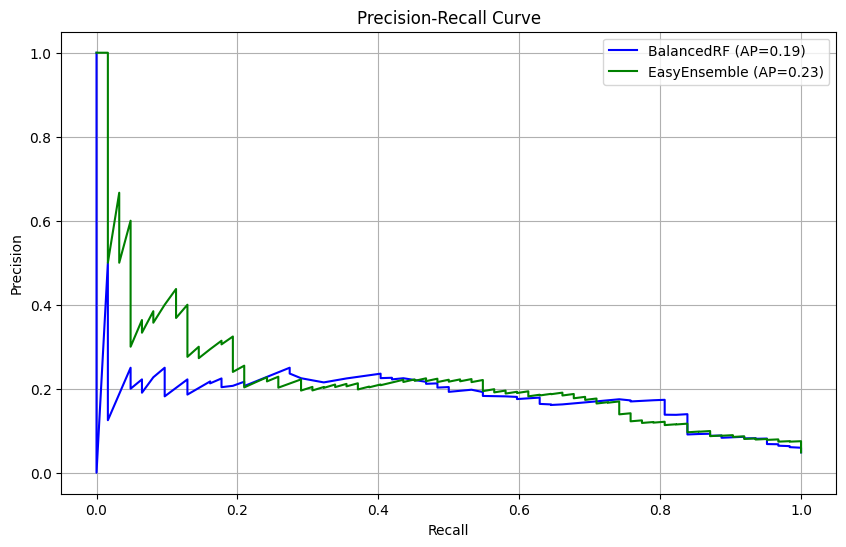

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Per BalancedRandomForest (modello già allenato prima)
y_proba_brf = best_model.predict_proba(X_test_cleaned)[:, 1]
precision_brf, recall_brf, thresholds_brf = precision_recall_curve(y_test_cleaned, y_proba_brf)
ap_brf = average_precision_score(y_test_cleaned, y_proba_brf)

# Per EasyEnsemble (modello già allenato ora)
y_proba_eec = eec.predict_proba(X_test_cleaned)[:, 1]
precision_eec, recall_eec, thresholds_eec = precision_recall_curve(y_test_cleaned, y_proba_eec)
ap_eec = average_precision_score(y_test_cleaned, y_proba_eec)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall_brf, precision_brf, label=f'BalancedRF (AP={ap_brf:.2f})', color='blue')
plt.plot(recall_eec, precision_eec, label=f'EasyEnsemble (AP={ap_eec:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


# ADV (work in progress)

## Plot distribuzioni features

## Features importance

In [59]:
importances = best_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train_cleaned.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)


                           feature  importance
0                              age    0.387216
5                avg_glucose_level    0.183888
6                              bmi    0.175084
3                     ever_married    0.034349
1                     hypertension    0.032384
14                     gender_Male    0.025949
4                   Residence_type    0.024968
12     smoking_status_never smoked    0.023347
2                    heart_disease    0.022148
8                work_type_Private    0.020192
11  smoking_status_formerly smoked    0.019871
9          work_type_Self-employed    0.019813
13           smoking_status_smokes    0.016520
10              work_type_children    0.014171
7           work_type_Never_worked    0.000100
15                    gender_Other    0.000001


In [60]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=len(y_train_cleaned[y_train_cleaned==1])/len(y_train_cleaned), random_state=42)
iso.fit(X_train_cleaned)

# Predizioni: -1 = anomalia, 1 = normale
y_pred_iso = iso.predict(X_test_cleaned)
# Convertiamo: anomalia = 1 (stroke), normale = 0
y_pred_iso = (y_pred_iso == -1).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_cleaned, y_pred_iso))
print(classification_report(y_test_cleaned, y_pred_iso))


[[1159   57]
 [  51   11]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1216
           1       0.16      0.18      0.17        62

    accuracy                           0.92      1278
   macro avg       0.56      0.57      0.56      1278
weighted avg       0.92      0.92      0.92      1278

